In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from collections import defaultdict
from pathlib import Path

import os
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

In [3]:
import sys 
#!{sys.executable} -m pip install git+https://github.com/textpipe/textpipe.git


* [1. Data Pre-Processing](#DPP)
    
    * [1.1. Renaming txt Files](#rename)

    * [1.2. Extracting Data](#extract)
    
    * [1.3. Clearing MetaData](#ClearMD)
    
* [2. Creating a Baseline](#Baseline)

<a class="anchor" id="DPP">

## 1. Data Preprocessing



<a class="anchor" id="rename">

### 1.1. Renaming .txt Files


In [37]:
#Changing the names of the .txt files so there's no duplicates

def change_file_name(author):
    i = 0
    my_dir_path = "Data/Corpora/train/" + author
    
    for filename in os.listdir(my_dir_path): 
        
        #Define the new and old names with directory path
        new_name =str(author) + str(i) + ".txt"
        old_name = my_dir_path + '/' + filename 
        new_name = my_dir_path + '/' + new_name 
        
        #So it doesn't give out an error when it runs for the second time
        # rename all the files 
        if new_name != old_name: #IT STILL GIVES OUT ERROR
            os.rename(old_name, new_name) 
        i += 1

In [38]:
authors = ['AlmadaNegreiros','CamiloCasteloBranco','EcaDeQueiros','JoseRodriguesSantos','JoseSaramago','LuisaMarquesSilva']
authors_sigla = ['AN','CCB','EQ','JRS','JS','LMS']

#### ONLY RUN ONCE IF ORIGINAL FILE NAMES otherwise it will give an error

In [39]:
#for a in range(len(authors)):
#    change_file_name(authors[a])

<a class="anchor" id="extract">

### 1.2. Extracting Data

In [40]:
#Create a df for one author the respective .txt files in the corpora
def create_df_from_txt(author):
    my_dir_path = "Data/Corpora/train/" + author

    results = defaultdict(list)
    for file in Path(my_dir_path).iterdir():
        with open(file, "r",encoding = 'utf8') as file_open:
            results["id"].append(file.name)
            results["text"].append(file_open.read())
            results["author"] = author
            file_open.close()
    df = pd.DataFrame(results)
    
    return df

In [41]:
#Join together the dataframes from all the authors
def join_df(authors):

    df = pd.DataFrame()
    for a in range(len(authors)):
        df = df.append(create_df_from_txt(authors[a]))
    df.reset_index(inplace = True, drop = True)    
    return df 

In [42]:
### Running all the functions

#Creating the training data frame
traindf = join_df(authors)

#Replacing the name of the authors with labels of their initials
for i in range(0,len(authors)):
    traindf.author = traindf.author.replace(authors[i],authors_sigla[i])
traindf

,id,text,author
0,AlmadaNegreiros0.txt,Title: A Scena do Odio\n\nAuthor: José de Alma...,AN
1,AlmadaNegreiros1.txt,Title: O Jardim da Pierrette\n\nAuthor: José d...,AN
2,AlmadaNegreiros2.txt,\n\nTitle: A Invenção do Dia Claro\n\nAuthor: ...,AN
3,AlmadaNegreiros3.txt,\nTitle: Litoral\n A Amadeo de Souza Car...,AN
4,AlmadaNegreiros4.txt,\n\n\nEXPOSIÇÃO\n\n+amadeo\nde souza\ncardoso+...,AN
...,...,...,...
58,LuisaMarquesSilva4.txt,Título\ne-medo\n\nAutora (inspiradíssima)\nLuí...,LMS
59,LuisaMarquesSilva5.txt,"LISBOA 2050\nLisboa, ano de 2050. Um Agosto tã...",LMS
60,LuisaMarquesSilva6.txt,Título\nUm passeio pelo inferno\n\nAutora\nLuí...,LMS
61,LuisaMarquesSilva7.txt,Título\nRapsódia sem dó (maior)\n\nAutora\nLuí...,LMS


<a class="anchor" id="clearMD">

### 1.2. Clearing MetaData
</a>

The majority of the .txt files have metadata at the beginning. This is unnecessary and may introduce noise in our model, as such it may be a good idea to remove it. 

In [43]:
import spacy

Testing with just one of the .txt:

In [44]:
test = traindf.iloc[0:1]
test

,id,text,author
0,AlmadaNegreiros0.txt,Title: A Scena do Odio\n\nAuthor: José de Alma...,AN


In [45]:
def set_custom_boundaries(doc):
    # Adds support to use '\n\n\n' as the delimiter for sentence detection
    for token in doc[:-1]:
        if token.text == '\n\n\n':
            doc[token.i+1].is_sent_start = True
    return doc


nlp = spacy.load('en_core_web_sm',disable=["parser"])
nlp.add_pipe(set_custom_boundaries)
custom_sentences = nlp(test.iloc[0,1])
custom_sentences = list(custom_sentences.sents)

i=0
for sentence in custom_sentences:
    print('**SPACE', i, '**', sentence)
    i +=1
#nlp_pt = spacy.load('pt_core_news_sm')

**SPACE 0 ** Title: A Scena do Odio

Author: José de Almada Negreiros

Release Date: September 16, 2007 [EBook #22615]

Language: Portuguese




A ALVARO DE CAMPOS

_Excerptos de um poema desbaratado
que foi escripto durante os
três dias e as três noites que durou
a revolução de 14 de Maio de 1915._



**SPACE 1 ** Satanizo-Me Tara na Vara de Moysés!
O castigo das serpentes é-Me riso nos dentes,
Inferno a arder o Meu cantar!
Sou Vermelho-Niagára dos sexos escancarados nos chicotes dos cossacos!
Sou Pan-Demonio-Trifauce enfermiço de Gula!
Sou Genio de Zarathustra em Taças de Maré-Alta!
Sou Raiva de Medusa e Damnação do Sol!

Ladram-Me a Vida por vivê-La
e só me deram Uma!
Hão-de lati-La por sina!
agora quero vivê-La!
Hei-de Poeta cantá-La em Gala sonora e dina!
Hei-de Gloria desannuviá-La!
Hei-de Guindaste içá-La Esfinge
da Valla commum onde Me querem rir!
Hei-de trovão-clarim levá-La Luz
ás Almas-Noites do Jardim das Lagrymas!
Hei-de bombo rufá-La pompa de Pompeia
nos Funeraes de Mim!


In [46]:
text_nometa = custom_sentences[1]

In [47]:
#WIP.... 
#Works for a few of the .txt files if the meta data is just at the beginning but not if there are too many large spaces (/n/n/n) or if there are spaces between the text

<a class="anchor" id="clearTexts">

### 1.4. Cleaning Texts
</a>


In [48]:
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from tqdm import tqdm_notebook as tqdm #progressbar
from unidecode import unidecode

In [49]:
def preprocessing(doc):
    processed_corpus = []
    stop_words = set(stopwords.words("portuguese"))
    for i in tqdm(range(len(doc))):
        text = doc['text'].iloc[i,]
        
        #Remove accents
        text = unidecode(text)

        #Lowercasing
        text = text.lower()
        
        # Convert to list from string
        text = text.split()

        #Lemmatisation
        lem = WordNetLemmatizer()
        text = [lem.lemmatize(word) for word in text if not word in stop_words] 
        
        text = " ".join(text)
        processed_corpus.append(text)
         
    return processed_corpus

In [53]:
traindf['clean_with_punc'] = preprocessing(traindf)

In [54]:
def nopunctuation(doc):
    processed_corpus = []
    for i in tqdm(range(len(doc))):
        text = doc['clean_with_punc'].iloc[i,]
        
        #Remove punctuation
        text = re.sub('[^A-Za-z0-9]',' ', text) 
        
        text = "".join(text)
        processed_corpus.append(text)
         
    return processed_corpus

In [55]:
traindf['clean'] = nopunctuation(traindf)
traindf

,id,text,author,clean_with_punc,clean
0,AlmadaNegreiros0.txt,Title: A Scena do Odio\n\nAuthor: José de Alma...,AN,title: scena odio author: jose almada negreiro...,title scena odio author jose almada negreiro...
1,AlmadaNegreiros1.txt,Title: O Jardim da Pierrette\n\nAuthor: José d...,AN,title: jardim pierrette author: jose almada ne...,title jardim pierrette author jose almada ne...
2,AlmadaNegreiros2.txt,\n\nTitle: A Invenção do Dia Claro\n\nAuthor: ...,AN,title: invencao dia claro author: jose almada ...,title invencao dia claro author jose almada ...
3,AlmadaNegreiros3.txt,\nTitle: Litoral\n A Amadeo de Souza Car...,AN,title: litoral amadeo souza cardozo author: jo...,title litoral amadeo souza cardozo author jo...
4,AlmadaNegreiros4.txt,\n\n\nEXPOSIÇÃO\n\n+amadeo\nde souza\ncardoso+...,AN,exposicao +amadeo souza cardoso+ liga naval li...,exposicao amadeo souza cardoso liga naval li...
...,...,...,...,...,...
58,LuisaMarquesSilva4.txt,Título\ne-medo\n\nAutora (inspiradíssima)\nLuí...,LMS,titulo e-medo autora (inspiradissima) luisa ma...,titulo e medo autora inspiradissima luisa ma...
59,LuisaMarquesSilva5.txt,"LISBOA 2050\nLisboa, ano de 2050. Um Agosto tã...",LMS,"lisboa 2050 lisboa, ano 2050. agosto tao gelad...",lisboa 2050 lisboa ano 2050 agosto tao gelad...
60,LuisaMarquesSilva6.txt,Título\nUm passeio pelo inferno\n\nAutora\nLuí...,LMS,titulo passeio inferno autora luisa marque sil...,titulo passeio inferno autora luisa marque sil...
61,LuisaMarquesSilva7.txt,Título\nRapsódia sem dó (maior)\n\nAutora\nLuí...,LMS,titulo rapsodia (maior) autora luisa marque si...,titulo rapsodia maior autora luisa marque si...


<a class="anchor" id="Baseline">

## 2. Creating a Baseline
    
</a>

Our goal now is to create a naíve baseline to compare our model with. It won't involve any pre-processing of data or removal of extra meta data.

1st Try: Using DummyClassifier as a baseline? 

In [56]:
import numpy as np
from sklearn.dummy import DummyClassifier

In [104]:
def dummy_classifier_score(df,text_column,strategy):

    X = df.loc[:,text_column]
    y = df.loc[:,'author']
    dummy_clf = DummyClassifier(strategy=strategy) #stratified, most_frequent
    dummy_clf.fit(X, y)
    dummy_clf.predict(X)
    return dummy_clf.score(X, y)

In [105]:
dummy_classifier_score(traindf,'text','most_frequent')

0.31746031746031744

Too stupid of a baseline? 

## Choosing Evaluation Metrics

Can we use Accuracy as an evaluation metric? Depends if the dataset is unbalanced. Let's check:

In [106]:
traindf.iloc[:,2].value_counts()

CCB    20
JS     12
LMS     9
AN      9
JRS     8
EQ      5
Name: author, dtype: int64

It is unbalanced in favour of Camilo Castelo Branco which is why we get a higher accuracy when we use the DummyClassifier with most frequent strategy (0.31) compared to other strategies (stratified 0.22) even though it's just classifying all texts as belonging to CCB. As such accuracy may not be the best metric in this case.

## Word Cloud

To see a word cloud - or the most frequent words - written by a given author just type in the function one of the following siglas: 


In [60]:
authors_sigla

['AN', 'CCB', 'EQ', 'JRS', 'JS', 'LMS']

Corresponding to the following authors:

In [61]:
authors

['AlmadaNegreiros',
 'CamiloCasteloBranco',
 'EcaDeQueiros',
 'JoseRodriguesSantos',
 'JoseSaramago',
 'LuisaMarquesSilva']

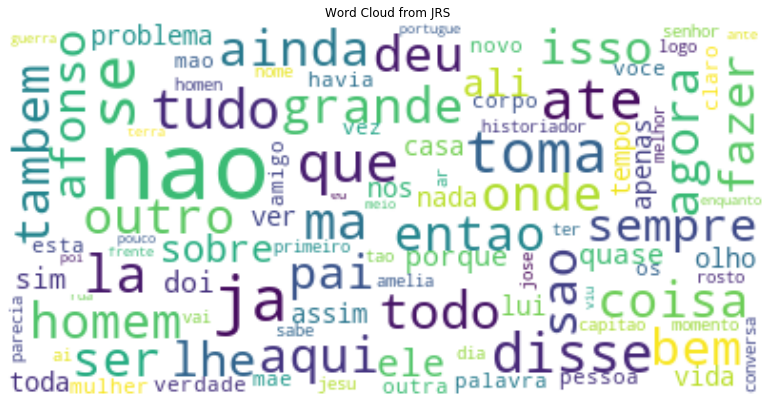

In [107]:
def word_cloud(author,text_column):
    word_cloud = " ".join(traindf[traindf['author']==author][text_column])


    # Create and generate a word cloud image:
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(word_cloud)
    # Display the generated image:
    plt.figure(figsize=(17,7))
    plt.title('Word Cloud from ' + author)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


word_cloud('JRS','clean')

WILL NEED TO REMOVE STOP WORDS FIRST BEFORE IT MAKES ANY SENSE 

## Testing the Importance of Punctuation

We know that José Saramago has an interesting use of punctuation and it can be a factor in identifying texts from him. Does this mean that we shouldn't consider punctuations as stop-words? Let's test it.

To do so we will use a dummy classifier on two texts from Saramago and two from JRS. Will we see a difference in the performance of the classifier with or without punctuation?

In [163]:
punc_traindf = traindf[traindf.author=='JS'][1:3].append(traindf[traindf.author=='JRS'][1:3])

We will run the dummy classifier n_iter times and determine the difference between the two. If the classifier is better with punctuation we should see a _positive difference_ meaning that the classifier that runs on the text with punctuation should have a better accuracy score than the one without. 

In [156]:
n_iter = 50000
score_punc_test = []
for i in range(0,n_iter):
    score_punc_test.append(dummy_classifier_score(punc_traindf,'clean_with_punc','stratified')-dummy_classifier_score(punc_traindf,'clean','stratified'))
    i += 1
score_punc_test = pd.DataFrame(score_punc_test)

In [157]:
score_punc_test.describe()

,0
count,50000.000000
mean,0.002720
std,0.353981
min,-1.000000
25%,-0.250000
50%,0.000000
75%,0.250000
max,1.000000


There's a very very small change between each classifiers. Which may indicate that there are no difference in the performance of the classifier of JS with or without punctuation. 

To confirm this, let's do a one sided hypothesis test, where the null hypothesis is that the mean of the difference between the scores is zero, meaning there is no difference between doing a classifier with or without punctuation for José Saramago.

In [164]:
from scipy.stats import ttest_1samp

diff_mean = np.mean(score_punc_test)
print('mean', diff_mean)
tset, pval = ttest_1samp(score_punc_test, 0)
print('p-values', pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print("Reject the null hypothesis: there are evidence that the classifier performs differently if there's punctuation")
else:
  print("Do not reject the null hypothesis: there are no evidence that the classifier is better if we mantain the punctuation")

mean 0    0.00272
dtype: float64
p-values [0.08576623]
Do not reject the null hypothesis: there are no evidence that the classifier is better if we mantain the punctuation
